# DAY_3_NN : Multi-class ANN using MNIST

In [23]:
from torchvision import datasets, transforms

# Step 1: Define a transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [2]:
train_dataset = datasets.MNIST(root='./data' , train = True , download=True , transform=transform)
test_dataset = datasets.MNIST(root = './data' , train = False , download=True , transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.73MB/s]


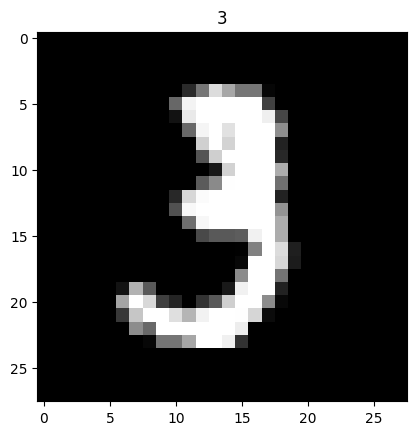

In [3]:
import matplotlib.pyplot as plt
image , labels = train_dataset[10]
plt.imshow(image.squeeze() , cmap='gray')
plt.title(labels)
plt.show()

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset , batch_size = 64 , shuffle = True)
test_dataloader = DataLoader(test_dataset , batch_size = 64 , shuffle = True)

In [5]:
image , labels = (next(iter(train_dataloader)))
print(image.shape)
print(labels.shape)
print(labels.unique())

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [6]:
from torch import nn
class ANN(nn.Module) :
  def __init__(self , input_size ):

    super(ANN , self).__init__()

    self.model = nn.Sequential(

      nn.Linear(in_features=input_size , out_features=64) ,
      nn.BatchNorm1d(64) ,
      nn.ReLU() ,
      nn.Dropout(p = 0.3) ,


      nn.Linear(in_features=64 , out_features=128) ,
      nn.BatchNorm1d(128) ,
      nn.ReLU() ,
      nn.Dropout(p = 0.3) ,

      nn.Linear(in_features=128 , out_features=64) ,
      nn.BatchNorm1d(64) ,
      nn.ReLU() ,
      nn.Dropout(p = 0.3) ,

      nn.Linear(in_features=64 , out_features=10)

    )

  def forward(self , x) :

    x = x.view(x.size(0), -1)   # flatten from [B, 1, 28, 28] → [B, 784]
    return self.model(x)



In [7]:
model = ANN(input_size= 28 * 28 )

In [12]:
import torch
epochs = 10
lr = 0.01
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = lr )

In [13]:
for epoch in range(epochs):
    train_correct = 0
    total_data = 0
    total_loss = 0.0

    model.train()
    for X_batch, y_batch in train_dataloader:
        outputs = model(X_batch)

        loss = loss_fn(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # ---- Accuracy Calculation ----
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == y_batch).sum().item()
        total_data += y_batch.size(0)
        total_loss += loss.item()

    # ---- Accuracy for this epoch ----
    train_accuracy = train_correct / total_data * 100
    avg_loss = total_loss / len(train_dataloader)

    print(f"Epoch {epoch+1:02d} | Loss: {avg_loss:.4f} | Accuracy: {train_accuracy:.2f}%")


Epoch 01 | Loss: 0.1688 | Accuracy: 95.07%
Epoch 02 | Loss: 0.1595 | Accuracy: 95.28%
Epoch 03 | Loss: 0.1543 | Accuracy: 95.46%
Epoch 04 | Loss: 0.1562 | Accuracy: 95.40%
Epoch 05 | Loss: 0.1571 | Accuracy: 95.38%


KeyboardInterrupt: 

In [22]:
model.eval()

with torch.inference_mode():

  test_correct = 0
  total_data = 0
  total_loss = 0.0
  for X_batch , y_batch in test_dataloader :
    outputs = model(X_batch)
    loss = loss_fn(outputs , y_batch)
    _, predicted = torch.max(outputs, 1)
    test_correct += (predicted == y_batch).sum().item()
    total_data += y_batch.size(0)
    total_loss += loss.item()
  test_accuracy = test_correct / total_data * 100
  avg_loss = total_loss / len(train_dataloader)

  print(f"Epoch {epoch+1:02d} | Loss: {avg_loss:.4f} | Accuracy: {test_accuracy:.2f}%")


Epoch 10 | Loss: 0.0135 | Accuracy: 97.56%


In [15]:
model.eval()

X_sample , y_sample = next(iter(test_dataloader))
image = X_sample[0].unsqueeze(0)
label = y_sample[0]

In [19]:
with torch.inference_mode():
  outputs = model(image)
  pred_class = outputs.argmax(dim = 1)
print(f"Predicted: {pred_class} | Actual: {label.item()}")


Predicted: tensor([3]) | Actual: 3
